# Information:
Before we get into the similations, it's firstly important to understand the context.

Here's a diagram of our intersection:


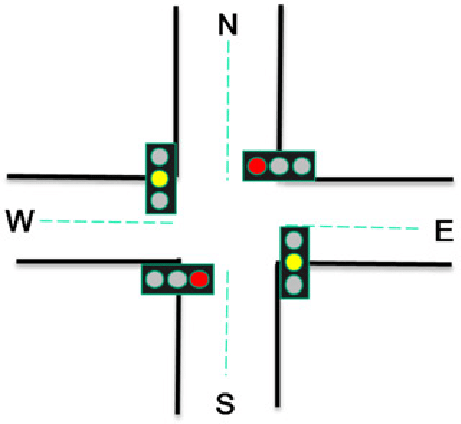

This a simple intersection with two different phases, since the N/S side and W/E side all have the same light phase.

Obviously, there are many complicating parameters and variables that would affect the results of our simulation (the individual speeds of the cars, the driver reaction time, the car size, following distance, etc.); in fact, this field of traffic simulation is called "microscopic," for this very reason.

In order to simplify this model and trully apply the practice of simulating mathematical models to recieve accurate, yet timely results, we make the following assumptions:
1. The driver reaction time, for the most part, is instantaneous. As soon as the light turns green, the car reaches constant veolocity.
2. Cars are treated as particles in this simulation, rather than having size.
3. Yellow lights are not included in this simulation. Only red and green are.
4. Turning right is not allowed on a red light, which would thereby decrease the queue.
5. Turning L/R is assumed to be idenitical to continuing straight in terms of queue time.


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Getting traffic volumes for urban and rural areas. Here, we look at some California Data from 2021, and we take Urban to be Los Angeles, and Rural to be Calaveras county.

# Random we didn't need

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRpFGjKgY5qQqkqirUY8KFvL0SlPCmSvDvIxsqHApSLALzuH66FFVDj5il_Y_-c5A/pub?gid=769778136&single=true&output=csv")

In [ ]:
df[df["COUNTY"]=="LA"].head()

,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
20,7,1,NaN,LA,NaN,0.000,NaN,LOS ANGELES/ORANGE COUNTY LINE,NaN,NaN,NaN,2650.0,44000.0,40500.0
21,7,1,NaN,LA,NaN,1.860,NaN,"LONG BEACH, BELLFLOWER BOULEVARD",2100.0,34500.0,32000.0,1550.0,26000.0,24200.0
22,7,1,NaN,LA,NaN,1.973,NaN,"LONG BEACH, JCT. RTE. 22",1550.0,26000.0,24200.0,2050.0,34000.0,31500.0
23,7,1,NaN,LA,NaN,2.751,NaN,"LONG BEACH, ANAHEIM STREET",2050.0,34000.0,31500.0,1700.0,28500.0,26500.0
24,7,1,NaN,LA,NaN,5.011,NaN,"LONG BEACH, CHERRY AVENUE",2200.0,36500.0,34000.0,2250.0,37000.0,34500.0


In [ ]:
df_urban = df[df["COUNTY"]=="LA"][["COUNTY","BACK_PEAK_HOUR","AHEAD_PEAK_HOUR"]].dropna()
df_urban["AVG Traffic"] = (df_urban["BACK_PEAK_HOUR"] + df_urban["AHEAD_PEAK_HOUR"])/2
df_urban=df_urban.sort_values(by="AVG Traffic")
print(len(list(df_urban['AHEAD_PEAK_HOUR'])))
print(sum(list(df_urban["AVG Traffic"]))/len(list(df_urban['AHEAD_PEAK_HOUR']))/24)
print(sum(list(df_urban["AVG Traffic"])))
# On average, an urban area (in this case, Los Angeles used as a model), sees about 445/hr.
df_urban.head(600)

685
445.5681265206813
7325140.0


,COUNTY,BACK_PEAK_HOUR,AHEAD_PEAK_HOUR,AVG Traffic
302,LA,10.0,10.0,10.0
2078,LA,10.0,10.0,10.0
2077,LA,10.0,10.0,10.0
301,LA,20.0,20.0,20.0
303,LA,10.0,30.0,20.0
...,...,...,...,...
6720,LA,17400.0,17900.0,17650.0
4750,LA,17200.0,18100.0,17650.0
4749,LA,18100.0,17200.0,17650.0
6073,LA,17800.0,17500.0,17650.0


In [ ]:
df_urban = df[df["COUNTY"]=="CAL"][["COUNTY","BACK_PEAK_HOUR","AHEAD_PEAK_HOUR"]].dropna()
df_urban["AVG Traffic"] = (df_urban["BACK_PEAK_HOUR"] + df_urban["AHEAD_PEAK_HOUR"])/2
df_urban=df_urban.sort_values(by="AVG Traffic")
print(len(list(df_urban['AHEAD_PEAK_HOUR'])))
print(sum(list(df_urban["AVG Traffic"]))/len(list(df_urban['AHEAD_PEAK_HOUR']))/24)
print(sum(list(df_urban["AVG Traffic"])))
# On average, an urban area (in this case, Los Angeles used as a model), sees about 445/hr.
df_urban.head(600)

44
29.029356060606062
30655.0


,COUNTY,BACK_PEAK_HOUR,AHEAD_PEAK_HOUR,AVG Traffic
1680,CAL,160.0,90.0,125.0
1679,CAL,130.0,130.0,130.0
1681,CAL,90.0,200.0,145.0
1677,CAL,200.0,210.0,205.0
1682,CAL,210.0,200.0,205.0
1683,CAL,200.0,230.0,215.0
1678,CAL,200.0,310.0,255.0
402,CAL,360.0,380.0,370.0
403,CAL,450.0,380.0,415.0
1671,CAL,550.0,460.0,505.0


# Fixed-Time
Simulation stuff: Webster method, and Fixed-Time

In [ ]:
# Webster's Method Simulation:

def webster_method(volume_a,volume_b,theoretical_volume_a,theoretical_volume_b, num_phases, all_red_time):
  critical_ratio_a = volume_a/theoretical_volume_a
  critical_ratio_b = volume_b/theoretical_volume_b
  total_critical_ratio = critical_ratio_a + critical_ratio_b
  lost_time = 2*num_phases+all_red_time
  optimal_cycle_time = (1.5*lost_time+5)/(1-total_critical_ratio)
  green_a = critical_ratio_a/total_critical_ratio * (optimal_cycle_time-lost_time)
  green_b = critical_ratio_b/total_critical_ratio * (optimal_cycle_time-lost_time)
  return [optimal_cycle_time, green_a, green_b]


In [ ]:
def poisson_generator(cars_per_hour,step_size):
  return np.random.poisson(cars_per_hour/(3600/step_size),1)[0] # Using a Poisson distribution to generate random car arrivals for the

In [ ]:
# Order of cycle: A Green/B Red -> B Green/A Red -> All Red -> To Beginning
def green_decider(time,cycle_time,webster_phase_time, webster_phase_time_2, all_red_time):
    return "A" if (time % cycle_time) < webster_phase_time + 2 else "B" if (time % cycle_time) < webster_phase_time + webster_phase_time_2 + 4 else "Red"

In [ ]:
def fixed_time_traffic_sim(volume_a,volume_b,theoretical_volume_a,theoretical_volume_b,num_phases,all_red_time, time_seconds, step_size,intersection_cross_rate):
  optimal_cycle_time, green_a, green_b = webster_method(volume_a,volume_b,theoretical_volume_a,theoretical_volume_b,num_phases,all_red_time) # According to the Webster method, find the optimal cycle times
  a_car_stock = [0] # Set up the queue for Phase A
  b_car_stock = [0] # Set up the queue for Phase B
  a_through = [0] # Set the cars that go through the intersection from Phase A
  b_through = [0] # Set the cars that go through the intersection from Phase B
  a_tot=0
  b_tot=0
  for i in range(time_seconds//step_size): # A is green at first. It's also assumed that each car takes 5 seconds to cross the intersection, however more advanced iterations for this simulations may see this number randomized.
    a=poisson_generator(volume_a,step_size)
    b=poisson_generator(volume_b,step_size)
    green = green_decider(i,optimal_cycle_time,green_a,green_b,all_red_time) # Returns true if Phase A is green
    a_car_stock.append(a_car_stock[i]+a)
    b_car_stock.append(b_car_stock[i]+b)
    b_through.append(b_through[i])
    a_through.append(a_through[i])
    a_tot+=a
    b_tot+=b
    if(green=="A"):
      #print("Green for A")
      a_car_stock[-1]-= intersection_cross_rate*step_size if a_car_stock[-2] >0  else 0
      a_through[-1] += intersection_cross_rate*step_size if a_car_stock[-2]>0 else 0
      #print("A"+ str(a_car_stock[-1]+a_through[-1]) +" , "+ str(a_tot))
    elif(green=="B"):
      #print("Green for B")
      b_car_stock[-1] -= intersection_cross_rate*step_size if b_car_stock[-2] > 0 else 0
      b_through[-1] += intersection_cross_rate*step_size if b_car_stock[-2]>0 else 0
      #print("B"+ str(b_car_stock[-1]+b_through[-1]) +" , "+ str(b_tot))

  return optimal_cycle_time, green_a, green_b, a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot


In [ ]:
optimal_cycle_time, green_a, green_b, a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot = fixed_time_traffic_sim(100,500,1900,1900,0,10,3600,1,1/3)

In [ ]:
optimal_cycle_time,green_a,green_b

(29.23076923076923, 3.205128205128205, 16.025641025641026)

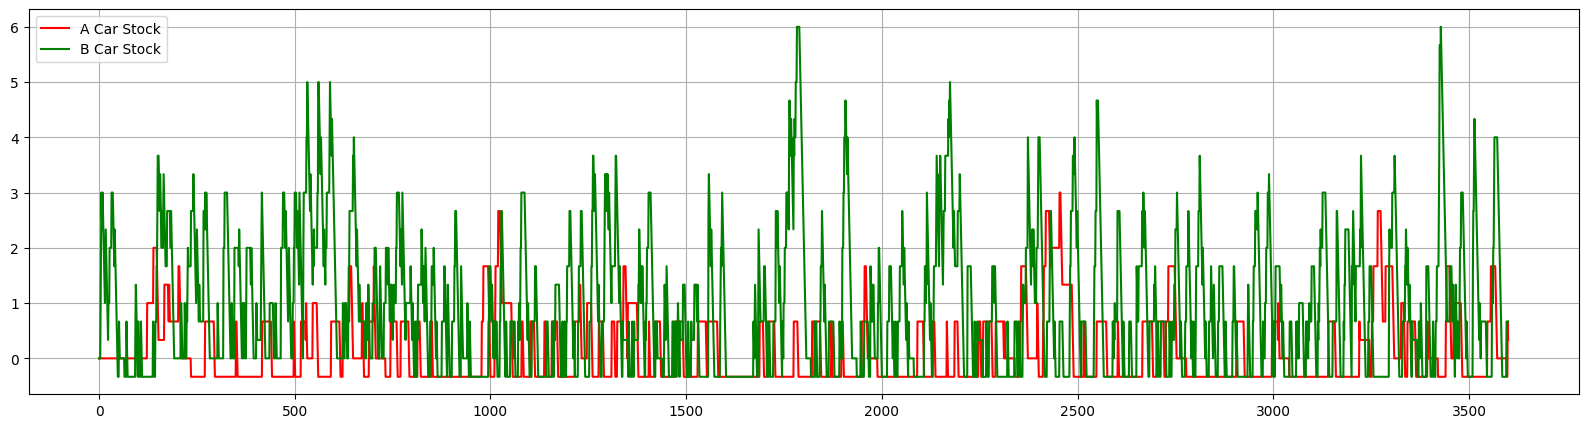

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(3601), a_car_stock, color='r', label='A Car Stock')
plt.grid()
plt.plot(range(3601), b_car_stock, color='g', label='B Car Stock')
plt.legend()

Text(0.5, 1.0, 'A Cars over Time')

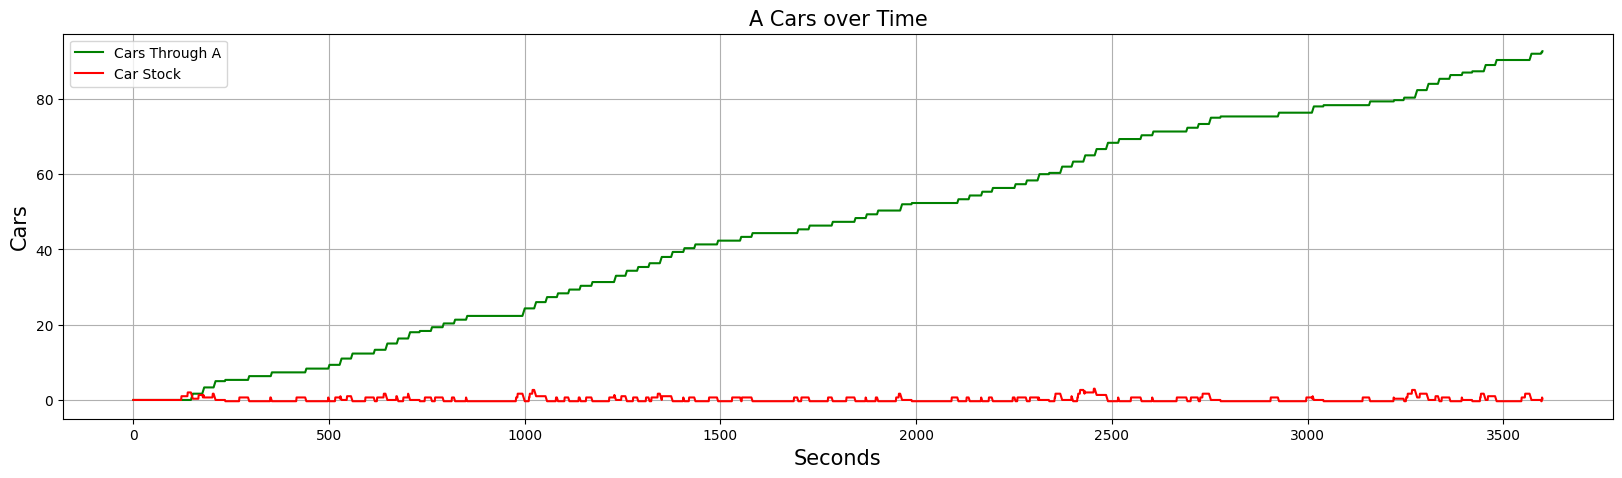

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(3601),a_through,color='g',label="Cars Through A")

plt.plot(range(3601),a_car_stock,color='r',label = "Car Stock")
plt.legend()
plt.ylabel("Cars",size=15)
plt.xlabel("Seconds",size=15)
plt.title("A Cars over Time",size=15)

Text(0.5, 1.0, 'B Cars over Time')

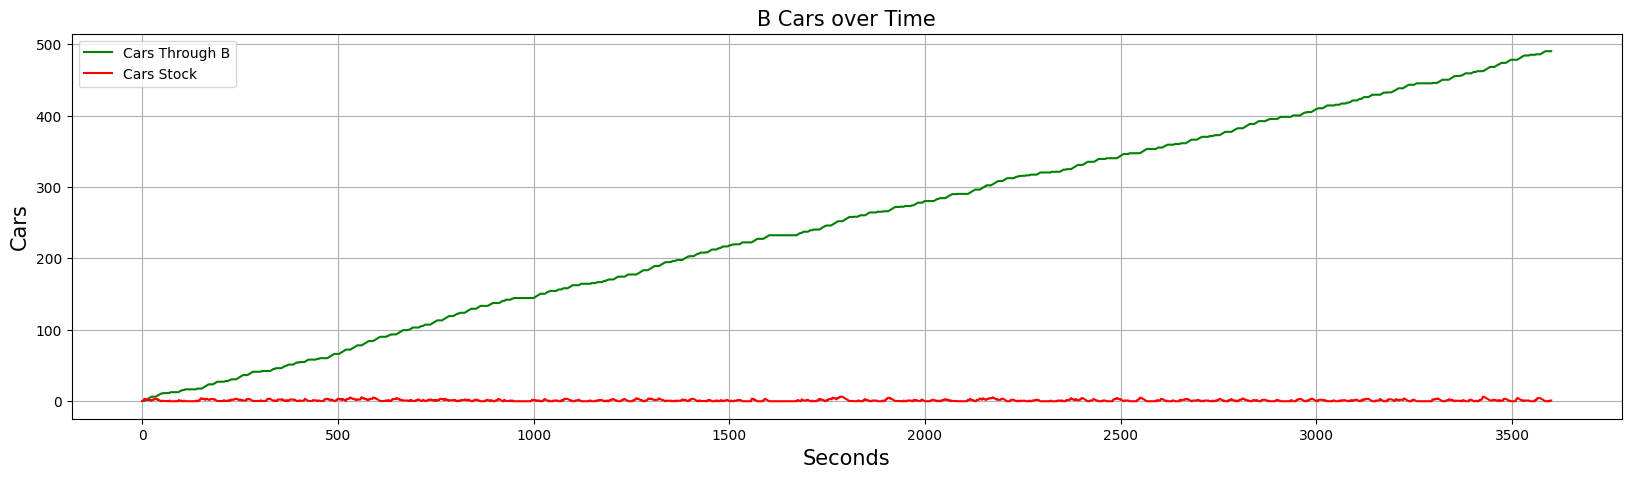

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(3601),b_through,color='g',label="Cars Through B")
plt.plot(range(3601),b_car_stock,color='r',label="Cars Stock")
plt.legend()
plt.ylabel("Cars",size=15)
plt.xlabel("Seconds",size=15)
plt.title("B Cars over Time",size=15)

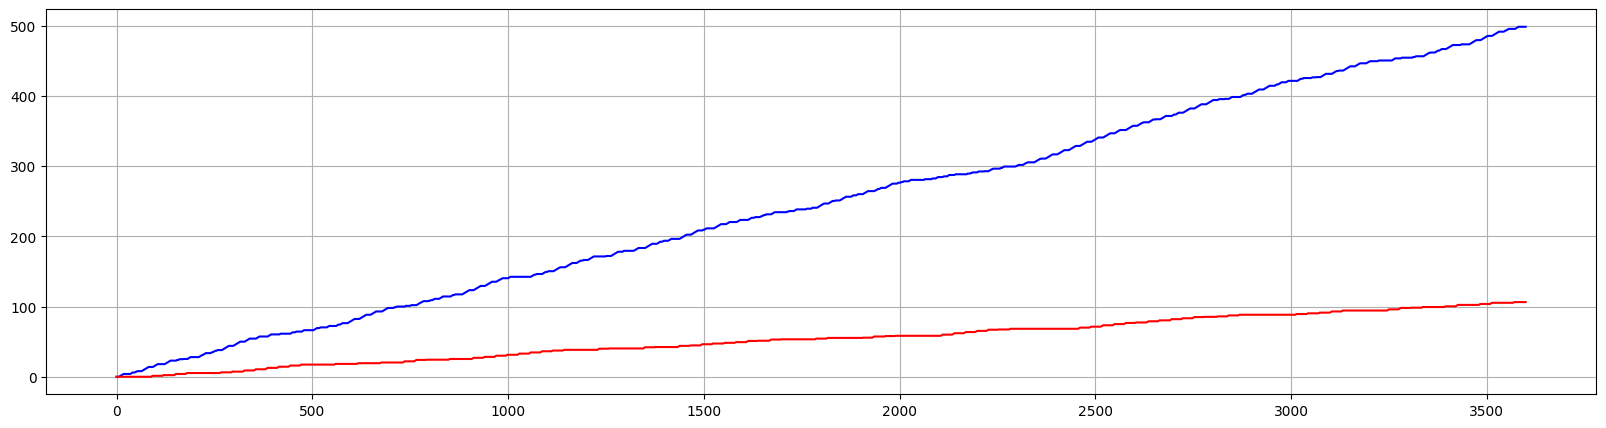

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(3600),b_through[0:3600],color='b')
plt.plot(range(3600),a_through[0:3600],color='r')

In [ ]:
a_tot,b_tot

(107, 499)

Results of Fixed-Time

In [ ]:
# Results of Fixed-Time
print("Throughput of Signal A: " + str(a_through[len(a_through)-1]))
print("Throughput of Signal B: " + str(b_through[len(a_through)-1]))
print("Average Delay Time of Signal A: " + str(3600/a_through[len(a_through)-1]))
print("Average Delay Time of Signal B: " + str(3600/b_through[len(b_through)-1]))

Throughput of Signal A: 106.66666666666623
Throughput of Signal B: 498.33333333332246
Average Delay Time of Signal A: 33.750000000000135
Average Delay Time of Signal B: 7.224080267558686


In [ ]:
# Qualifying Efficiency:
print("Signal A: " + str(a_through[len(a_through)-1]) + " / " + str(a_tot) + " = " + str(a_through[len(a_through)-1]/a_tot))
print("Signal B: " + str(a_through[len(b_through)-1]) + " / " + str(b_tot) + " = " + str(b_through[len(b_through)-1]/b_tot))
print("Wait Cycles:")
print("A: " + str(3600/a_through[len(a_through)-1]/optimal_cycle_time) + " B: " + str(3600/b_through[len(b_through)-1]/optimal_cycle_time))

Signal A: 106.66666666666623 / 107 = 0.9968847352024881
Signal B: 106.66666666666623 / 499 = 0.9986639946559568
Wait Cycles:
A: 1.1546052631578994 B: 0.2471395881006919


# Adaptive Traffic Model
Now, for my adaptive traffic intersection method. While most systems are based off articifial learning and some sort of ML type of method, I want to use a more logic method.

In [ ]:
def adaptive_time_traffic_sim(volume_a,volume_b,num_phases,all_red_time, time_seconds, step_size, intersection_cross_rate):
  a_car_stock = [0] # Set up the queue for Phase A
  b_car_stock = [0] # Set up the queue for Phase B
  a_through = [0] # Set the cars that go through the intersection from Phase A
  b_through = [0] # Set the cars that go through the intersection from Phase B
  a_tot=0
  b_tot=0
  a_is_green = True if max(volume_a,volume_b) == volume_a else False
  switch_times = []
  switch_times.append(a_is_green)
  lost_time = 2
  for i in range(time_seconds//step_size):
    #print(i)
    a=poisson_generator(volume_a,step_size)
    b=poisson_generator(volume_b,step_size)
    a_car_stock.append(a_car_stock[i]+a)
    b_car_stock.append(b_car_stock[i]+b)
    b_through.append(b_through[i])
    a_through.append(a_through[i])
    a_tot+=a
    b_tot+=b
    if lost_time != 0: # This is the lost time. In this simulation, no all_red_time is assumed, though it can be easily built in later.
      lost_time-=1
    else:
      if a_is_green and traffic_forecaster(a_car_stock[i+1],b_car_stock[i+1],volume_a,volume_b,int(i*step_size),a_is_green, intersection_cross_rate) > int(i*step_size): # This means that A stays green, as the forecasted switch time has not been reached yet.
        a_car_stock[-1]-= intersection_cross_rate*step_size if a_car_stock[-2] >0  else 0
        a_through[-1] += intersection_cross_rate*step_size if a_car_stock[-2]>0 else 0
        #print(a_through[i+1],b_through[i+1])
      elif not a_is_green and traffic_forecaster(a_car_stock[i+1],b_car_stock[i+1],volume_a,volume_b,int(i*step_size),a_is_green, intersection_cross_rate) > int(i*step_size): # This means that B stays green, as the forecasted switch time has not been reached yet.
        # print("B is green, switch time = " + str(traffic_forecaster(a_car_stock[i],b_car_stock[i],volume_a,volume_b,int(i*step_size),a_is_green, intersection_cross_time)))
        b_car_stock[-1] -= intersection_cross_rate*step_size if b_car_stock[-2] > 0 else 0
        b_through[-1] += intersection_cross_rate*step_size if b_car_stock[-2]>0 else 0
        #print(a_through[i+1],b_through[i+1])
      else:
        #print("Switch from " + "A" if a_is_green else "B")
        a_is_green = not a_is_green # Reverse the light color.
        lost_time = 2

    switch_times.append(a_is_green)


  return a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot, switch_times


In [ ]:
  def traffic_forecaster(current_vol_a, current_vol_b, rate_a, rate_b, time, a_is_green, intersection_cross_time): # returns the switch time
  # This method is meant to maximize cars crossing the intersection, whether it's A or B cars. It essentially takes a starting place, and with some forecasting, figures out when the addition of cars to the Red end
  # is greater than the amount of cars released on the Green side. At this equilibrium point, it changes lights.
    initial_time = time
    queue_time_a = current_vol_a * intersection_cross_time
    queue_time_b = current_vol_b * intersection_cross_time
    if a_is_green:
      while(queue_time_a >= queue_time_b and time < 3600):
        time+=1 # Time step for this "low accuracy method" is 1 second
        current_vol_a+=max(rate_a/3600 - intersection_cross_time,0)
        current_vol_b+=max(rate_b/3600,0)
        queue_time_a = current_vol_a * 1/intersection_cross_time
        queue_time_b = current_vol_b * 1/intersection_cross_time
      return time if initial_time != 0 else 1
    else:
      while(queue_time_b >= queue_time_a and time < 3600):
        time+=1
        current_vol_b+=max(rate_b/3600 - intersection_cross_time,0)
        current_vol_a+=max(rate_a/3600,0)
        queue_time_a = current_vol_a * 1/intersection_cross_time
        queue_time_b = current_vol_b * 1/intersection_cross_time
      return time if initial_time != 0 else 1
    return time

In [ ]:
a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot, switch_times = adaptive_time_traffic_sim(1000,1000,2,0,3600,1,0.333)

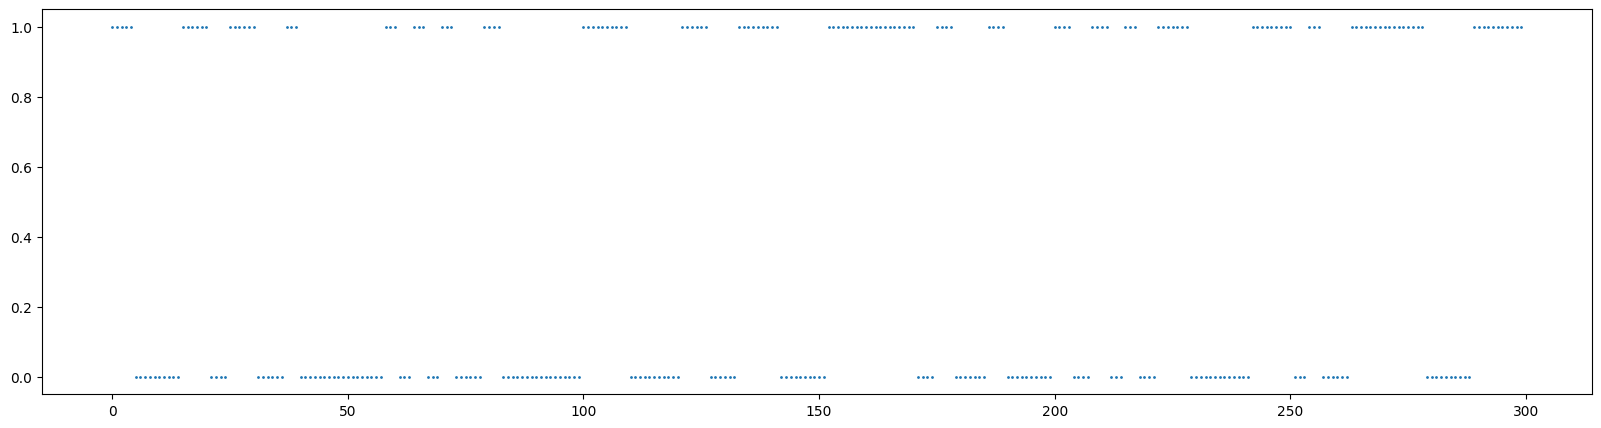

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(range(300),switch_times[0:300],s=1)

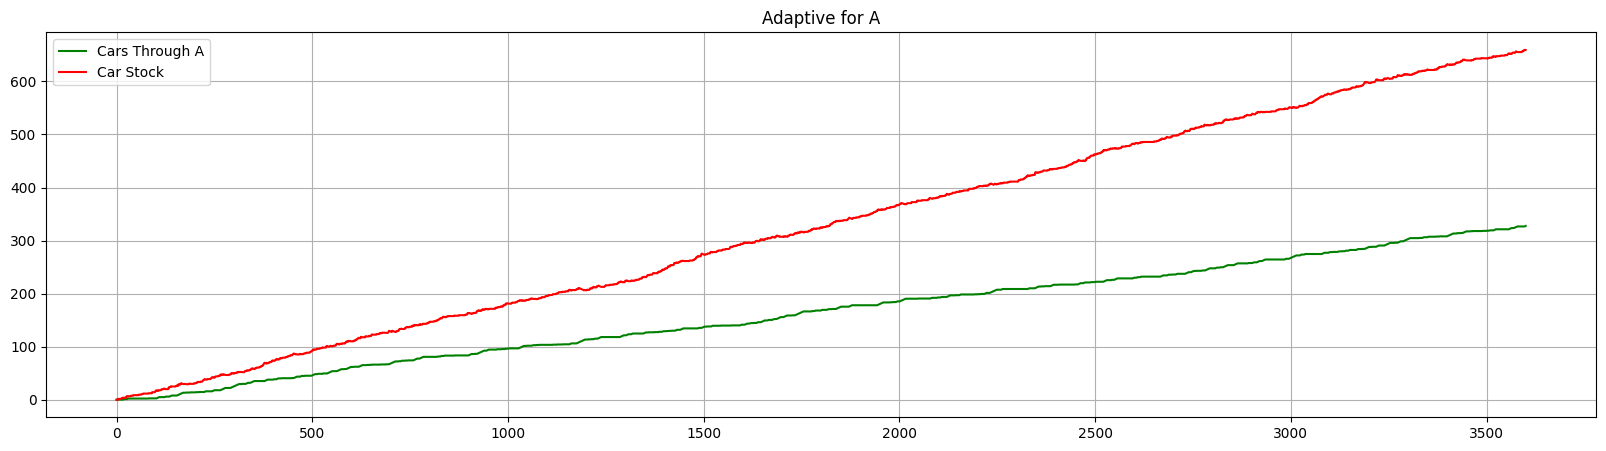

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(3601),a_through,color='g',label="Cars Through A")

plt.plot(range(3601),a_car_stock,color='r',label = "Car Stock")
plt.title("Adaptive for A")
plt.legend()

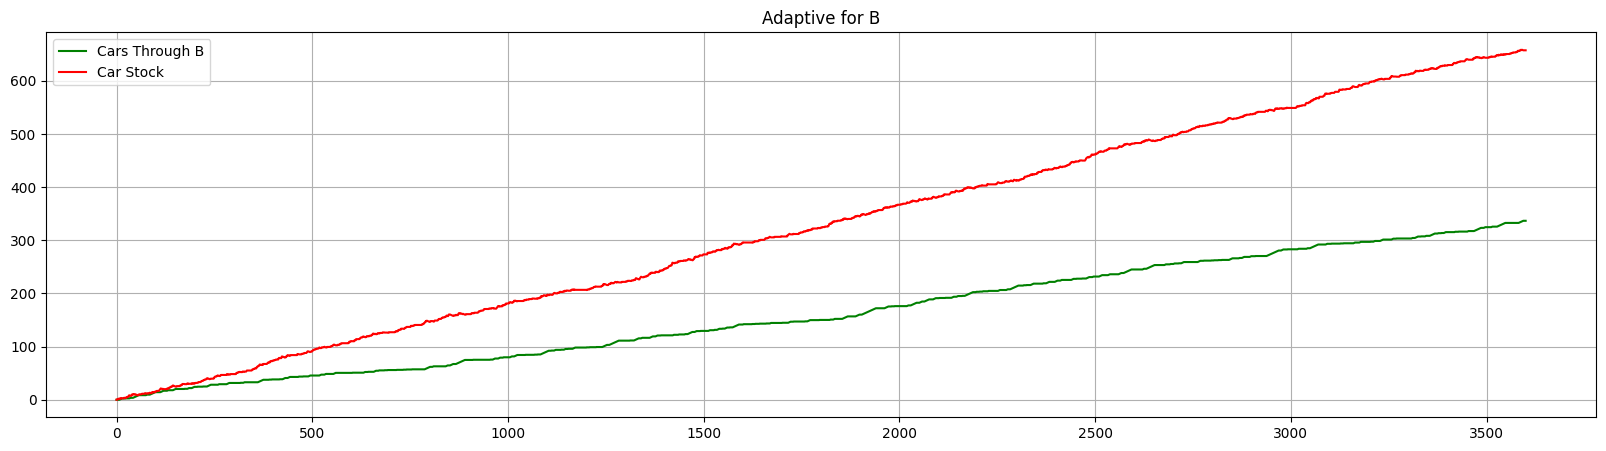

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(3601),b_through,color='g',label="Cars Through B")

plt.plot(range(3601),b_car_stock,color='r',label = "Car Stock")
plt.title("Adaptive for B")
plt.legend()

In [ ]:
# Results of Fixed-Time
print("Throughput of Signal A: " + str(a_through[len(a_through)-1]))
print("Throughput of Signal B: " + str(b_through[len(a_through)-1]))
print("Average Delay Time of Signal A: " + str(3600/a_through[len(a_through)-1]))
print("Average Delay Time of Signal B: " + str(3600/b_through[len(b_through)-1]))

# Qualifying Efficiency:
print("Signal A: " + str(a_through[len(a_through)-1]) + " / " + str(a_tot) + " = " + str(a_through[len(a_through)-1]/a_tot))
print("Signal B: " + str(b_through[len(b_through)-1]) + " / " + str(b_tot) + " = " + str(b_through[len(b_through)-1]/b_tot))
print("Wait Cycles:")
print("A: " + str(3600/a_through[len(a_through)-1]/optimal_cycle_time) + " B: " + str(3600/b_through[len(b_through)-1]/optimal_cycle_time))

Throughput of Signal A: 327.67200000000463
Throughput of Signal B: 336.66300000000535
Average Delay Time of Signal A: 10.986596352449856
Average Delay Time of Signal B: 10.693185767369574
Signal A: 327.67200000000463 / 987 = 0.33198784194529346
Signal B: 336.66300000000535 / 994 = 0.3386951710261623
Wait Cycles:
A: -0.0289120956643417 B: -0.028139962545709375


# Comparison
Now that we've built these models, let's run them against each other.

In [ ]:
def compare(volume_a,volume_b,theoretical_volume_a,theoretical_volume_b,num_phases,all_red_time, time_seconds, step_size,intersection_cross_rate):
  fixed_time_tot = [0,0,0,0] # A Through, B Through, A Stock, B Stock
  adaptive_time_tot = [0,0,0,0] # A Through, B Through, A Stock, B Stock
  a_totf=0
  b_totf=0
  a_tota=0
  b_tota=0
  for i in range(20):
    optimal_cycle_time, green_a, green_b, a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot = fixed_time_traffic_sim(volume_a,volume_b,theoretical_volume_a,theoretical_volume_b,num_phases,all_red_time, time_seconds, step_size,intersection_cross_rate)
    fixed_time_tot[0] += a_through[-1]
    fixed_time_tot[1] += b_through[-1]
    fixed_time_tot[2] += a_car_stock[-1]
    fixed_time_tot[3] += b_car_stock[-1]
    a_totf+=a_tot
    b_totf+=b_tot

    a_car_stock, a_through, b_car_stock, b_through, a_tot, b_tot, switch_times = adaptive_time_traffic_sim(volume_a,volume_b,num_phases,all_red_time,time_seconds,step_size,intersection_cross_rate)
    adaptive_time_tot[0] += a_through[-1]
    adaptive_time_tot[1] += b_through[-1]
    adaptive_time_tot[2] += a_car_stock[-1]
    adaptive_time_tot[3] += b_car_stock[-1]
    a_tota+=a_tot
    b_tota+=b_tot

  return [i/20 for i in fixed_time_tot], [i/20 for i in adaptive_time_tot], [a_totf/20,b_totf/20,a_tota/20,b_tota/20]

In [ ]:
def get_results(fixed,a):
  print("Fixed")
  print("Throughput Efficiency")
  print("A: " + str(fixed[0]/(fixed[0]+fixed[2])*100) + "%")
  print("B: " + str(fixed[1]/(fixed[1]+fixed[3])*100) + "%")
  print("Queue Delay")
  print("A: "  + str(3600/(fixed[0]+fixed[2])) + "s")
  print("B: "  + str(3600/(fixed[1]+fixed[3])) + "s")
  print()
  print("Adaptive:")
  print("Throughput Efficiency")
  print("A: " + str(a[0]/(a[0]+a[2])*100) + "%")
  print("B: " + str(a[1]/(a[1]+a[3])*100) + "%")
  print("Queue Delay")
  print("A: "  + str(3600/(a[0]+a[2])) + "s")
  print("B: "  + str(3600/(a[1]+a[3])) + "s")

  return [fixed[0]/(fixed[0]+fixed[2]),fixed[1]/(fixed[1]+fixed[3]),3600/(fixed[0]+fixed[2]),3600/(fixed[1]+fixed[3]),a[0]/(a[0]+a[2]),a[1]/(a[1]+a[3]),3600/(a[0]+a[2]),3600/(a[1]+a[3])] # Throughput Efficiencies Fixed A, Fixed B, Queue Delay A, B, Throughput Efficiences Adap. A, Adap. B, Queue Delay A, B


In [ ]:
sim_results = []

In [ ]:
fixed, adaptive,tot = compare(1000,1000,1900,1900,2,0,3600,1,1/3)
get_results(fixed,adaptive)

Fixed
Throughput Efficiency
A: 59.520844747720695%
B: 0.0%
Queue Delay
A: 3.586193156348037s
B: 3.5815549917922698s

Adaptive:
Throughput Efficiency
A: 34.77694235588964%
B: 33.94514019165439%
Queue Delay
A: 3.609022556390993s
B: 3.650560259595411s


[0.5952084474772069,
 0.0,
 3.586193156348037,
 3.5815549917922698,
 0.3477694235588964,
 0.3394514019165439,
 3.609022556390993,
 3.650560259595411]

In [ ]:
for i in range(1,10):
  for j in range(1,10):
    fixed, adaptive,tot = compare(100*i,100*j,1900,1900,2,0,3600,1,1/5)
    #print(fixed,adaptive,tot)
    sim_results.append(get_results(fixed,adaptive))

In [ ]:

with open("results_5sec.txt","w") as f:
  f.write(str(sim_results))

# Graphing Results

In [ ]:
with open("results_5sec.txt","r") as f:
  results = eval(f.read())

In [ ]:
results_page = pd.DataFrame(data=results, columns = ["Fixed A Through","Fixed B Through","Fixed A Delay","Fixed B Delay","Adaptive A Through","Adaptive B Through","Adaptive A Delay","Adaptive B Delay"])

In [ ]:
results_page.head()

,Fixed A Through,Fixed B Through,Fixed A Delay,Fixed B Delay,Adaptive A Through,Adaptive B Through,Adaptive A Delay,Adaptive B Delay
0,0.998246,0.997437,37.151703,35.485461,0.998754,0.997879,37.383178,36.363636
1,0.997823,0.997909,35.625928,17.505470,0.983551,0.990464,36.108325,18.067754
2,0.999026,0.996650,35.070628,12.180680,0.839747,0.944868,34.985423,11.842105
3,0.998509,0.997331,35.785288,9.237875,0.636651,0.911015,36.753446,8.871365
4,0.991962,0.989058,34.042553,7.174888,0.446505,0.887825,35.696579,7.120957


In [ ]:
results_page["B Volume"] = 9*[100*i for i in range(1,10)]
a_vol=[]
for i in range(1,10):
  for j in range(1,10):
    a_vol.append(i*100)
results_page["A Volume"] = a_vol

In [ ]:
results_page.head()

,Fixed A Through,Fixed B Through,Fixed A Delay,Fixed B Delay,Adaptive A Through,Adaptive B Through,Adaptive A Delay,Adaptive B Delay,B Volume,A Volume
0,0.998246,0.997437,37.151703,35.485461,0.998754,0.997879,37.383178,36.363636,100,100
1,0.997823,0.997909,35.625928,17.505470,0.983551,0.990464,36.108325,18.067754,200,100
2,0.999026,0.996650,35.070628,12.180680,0.839747,0.944868,34.985423,11.842105,300,100
3,0.998509,0.997331,35.785288,9.237875,0.636651,0.911015,36.753446,8.871365,400,100
4,0.991962,0.989058,34.042553,7.174888,0.446505,0.887825,35.696579,7.120957,500,100


In [ ]:
df=results_page[["A Volume","B Volume","Fixed A Through","Fixed B Through","Fixed A Delay","Fixed B Delay","Adaptive A Through","Adaptive B Through","Adaptive A Delay","Adaptive B Delay"]]

In [ ]:
df["A Diff"] = df["Fixed A Through"] - df["Adaptive A Through"]
df["B Diff"] = df["Fixed B Through"] - df["Adaptive B Through"]

<ipython-input-8-bfecdde9459e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["A Diff"] = df["Fixed A Through"] - df["Adaptive A Through"]
<ipython-input-8-bfecdde9459e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["B Diff"] = df["Fixed B Through"] - df["Adaptive B Through"]


In [ ]:
print(sum(list(df['Adaptive A Through']))/81)
print(sum(list(df['Adaptive B Through']))/81)

0.48505774069246144
0.4843099192512358


In [ ]:
print(((sum(list(df["Fixed B Through"]))-sum(list(df["Adaptive B Through"])))/sum(list(df["Adaptive B Through"]))))

0.5347175997866133


In [ ]:
df.tail(20)

,A Volume,B Volume,Fixed A Through,Fixed B Through,Fixed A Delay,Fixed B Delay,Adaptive A Through,Adaptive B Through,Adaptive A Delay,Adaptive B Delay,A Diff,B Diff
61,700,800,0.480302,0.469741,5.088699,4.468996,0.263562,0.361060,5.158332,4.470106,0.216740,0.108681
62,700,900,0.458942,0.441043,5.152795,3.993344,0.206681,0.389513,5.194805,3.990688,0.252261,0.051529
63,800,100,0.738192,0.979279,4.523465,36.566785,0.861708,0.041475,4.496908,36.866359,-0.123516,0.937804
64,800,200,0.670055,0.890031,4.473161,18.311292,0.774239,0.096640,4.546029,18.466273,-0.104184,0.793390
65,800,300,0.621051,0.746204,4.481514,12.311902,0.676406,0.129291,4.468164,12.127337,-0.055355,0.616913
66,800,400,0.587075,0.640718,4.544020,9.098951,0.586471,0.168156,4.505350,9.112771,0.000603,0.472562
67,800,500,0.541754,0.557537,4.497751,7.047768,0.504423,0.200828,4.498313,7.266855,0.037331,0.356710
68,800,600,0.507505,0.522686,4.506478,6.014033,0.429984,0.232862,4.465947,6.023592,0.077521,0.289824
69,800,700,0.483422,0.488123,4.555809,5.214368,0.357692,0.273196,4.482351,5.073281,0.125730,0.214927
70,800,800,0.451582,0.442511,4.485422,4.474829,0.297090,0.295742,4.466778,4.475107,0.154492,0.146768


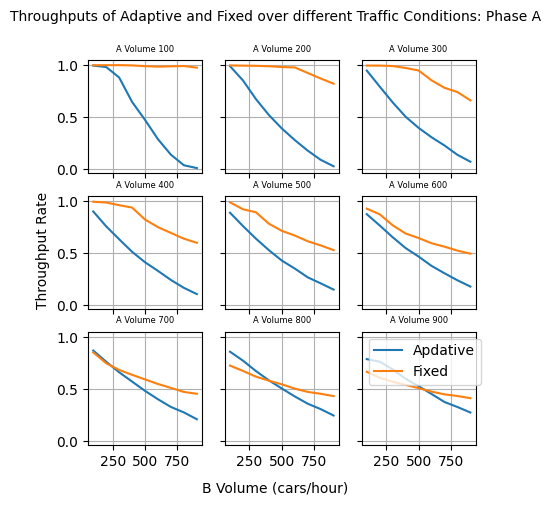

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(5, 5),sharex=True, sharey=True) # Each for the different A Volume, and the x axis is by A Volume
fig.suptitle("Throughputs of Adaptive and Fixed over different Traffic Conditions: Phase A",size=10)
for i in range(3):
  for j in range(3):
    ax[i,j].plot(np.linspace(100,900,9),list(df["Adaptive A Through"])[9*(i*3+j):9*((i*3+j)+1)],label="Apdative")
    ax[i,j].plot(np.linspace(100,900,9),list(df["Fixed A Through"])[9*(i*3+j):9*((i*3+j)+1)],label="Fixed")
    ax[i,j].set_title("A Volume " + str((i*3+j+1)*100),size=6)
    ax[i,j].grid()
fig.supxlabel('B Volume (cars/hour)',size=10)
fig.supylabel('Throughput Rate',size=10)
plt.legend(loc="best")

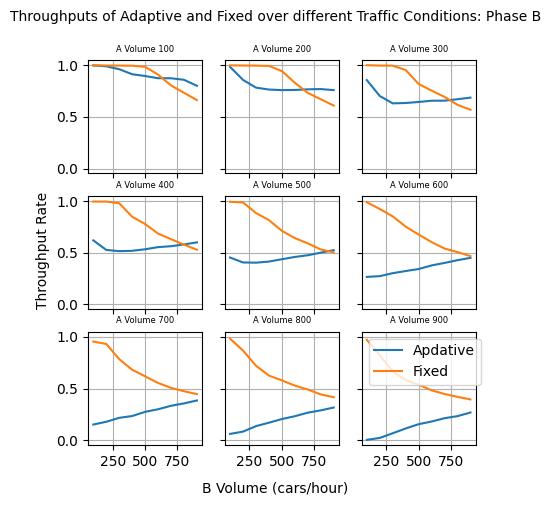

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(5, 5),sharex=True, sharey=True) # Each for the different A Volume, and the x axis is by A Volume
fig.suptitle("Throughputs of Adaptive and Fixed over different Traffic Conditions: Phase B",size=10)
for i in range(3):
  for j in range(3):
    ax[i,j].plot(np.linspace(100,900,9),list(df["Adaptive B Through"])[9*(i*3+j):9*((i*3+j)+1)],label="Apdative")
    ax[i,j].plot(np.linspace(100,900,9),list(df["Fixed B Through"])[9*(i*3+j):9*((i*3+j)+1)],label="Fixed")
    ax[i,j].set_title("A Volume " + str((i*3+j+1)*100),size=6)
    ax[i,j].grid()
fig.supxlabel('B Volume (cars/hour)',size=10)
fig.supylabel('Throughput Rate',size=10)
plt.legend(loc="best")